In [1]:
!pip install llmlingua openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 M

In [2]:
pip show llmlingua

Name: llmlingua
Version: 0.2.2
Summary: To speed up LLMs' inference and enhance LLM's perceive of key information, compress the prompt and KV-Cache, which achieves up to 20x compression with minimal performance loss.
Home-page: https://github.com/microsoft/LLMLingua
Author: The LLMLingua team
Author-email: hjiang@microsoft.com
License: MIT License
Location: /usr/local/lib/python3.10/dist-packages
Requires: accelerate, nltk, numpy, tiktoken, torch, transformers
Required-by: 


**APRENDENDO A UTILIZAR O PROMPTCOMPRESSOR OS ARGUMENTOS DA FUNÇÃO**

In [3]:
import llmlingua
help(llmlingua.PromptCompressor.compress_prompt)

Help on function compress_prompt in module llmlingua.prompt_compressor:

compress_prompt(self, context: List[str], instruction: str = '', question: str = '', rate: float = 0.5, target_token: float = -1, iterative_size: int = 200, force_context_ids: List[int] = None, force_context_number: int = None, use_sentence_level_filter: bool = False, use_context_level_filter: bool = True, use_token_level_filter: bool = True, keep_split: bool = False, keep_first_sentence: int = 0, keep_last_sentence: int = 0, keep_sentence_number: int = 0, high_priority_bonus: int = 100, context_budget: str = '+100', token_budget_ratio: float = 1.4, condition_in_question: str = 'none', reorder_context: str = 'original', dynamic_context_compression_ratio: float = 0.0, condition_compare: bool = False, add_instruction: bool = False, rank_method: str = 'llmlingua', concate_question: bool = True, context_segs: List[str] = None, context_segs_rate: List[float] = None, context_segs_compress: List[bool] = None, target_cont

In [4]:
from tiktoken import encoding_for_model

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/Tweets Sentiment Analysis.csv')

In [7]:
import getpass
import openai

secret_key = getpass.getpass('Digite sua chave da OpenAI: ')
openai.api_key = secret_key

Digite sua chave da OpenAI: ··········


In [8]:
client = openai.Client(api_key=secret_key)

In [9]:
def count_tokens_openai(model, messages):
    encoding = encoding_for_model(model)
    num_tokens = 0
    for message in messages:
        num_tokens += len(encoding.encode(message['content']))
    return num_tokens

**FUNÇÃO DE CLASSIFICAÇÃO DA ANÁLISE DE SENTIMENTOS PELO MODELO**



In [10]:
def analyze_sentiment_openai(text):
    messages = [
        {"role": "system", "content": "You are a sentiment analysis expert. Please classify the tweet as 'positive', 'negative', or 'neutral'. Do not provide any other form of response."},
        {"role": "user", "content": f"Analyze the sentiment of the following text: '{text}'"}
    ]

    response = client.chat.completions.create(
        model="gpt-4-turbo",
        messages=messages,
        max_tokens=300,
        temperature=0.3,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )
    sentiment = response.choices[0].message.content.strip().lower()
    tokens_used = count_tokens_openai("gpt-4-turbo", messages) + count_tokens_openai("gpt-4-turbo", [{"content": sentiment}])
    return sentiment, tokens_used

**IMPORT DA BIBLIOTECA DE COMPRESSÃO DE PROMPT DO LLMLINGUA**

In [11]:
from llmlingua import PromptCompressor

In [12]:
llm_lingua = PromptCompressor()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

**TESTANDO A BIBLIOTECA**

In [13]:
instruction = "Please compress this text "
question = 'Sam bought a dozen boxes, each with 30 highlighter pens inside, for $10 each box. He reanged five of boxes into packages of sixlters each and sold them $3 per. He sold the rest theters separately at the of three pens $2. How much did make in total, dollars?\nLets think step step\nSam bought 1 boxes x00 oflters.\nHe bought 12 * 300ters in total\nSam then took 5 boxes 6ters0ters.\nHe sold these boxes for 5 *5\nAfterelling these  boxes there were 3030 highlighters remaining.\nThese form 330 / 3 = 110 groups of three pens.\nHe sold each of these groups for $2 each, so made 110 * 2 = $220 from them.\nIn total, then, he earned $220 + $15 = $235.\nSince his original cost was $120, he earned $235 - $120 = $115 in profit.\nThe answer is 115'
context = question

In [14]:
compressed_prompt = llm_lingua.compress_prompt(context, instruction="", question="", target_token = 50)
compressed_prompt

{'compressed_prompt': 'Sam a dozen0 each He reanged of boxes into sixl them per rest theters the of pens,\nets think1 boxes x0 of200Sam then boxesters *\nAfter  boxes0ese0 so he earned $220 + $15 = $235.\nSince his original cost was $120, he earned $235 - $120 = $115 in profit.\nThe answer is 115',
 'origin_tokens': 209,
 'compressed_tokens': 79,
 'ratio': '2.6x',
 'rate': '37.8%',
 'saving': ', Saving $0.0 in GPT-4.'}

In [15]:
def count_tokens_text(model, text):
    encoding = encoding_for_model(model)
    return len(encoding.encode(text))

**APLICANDO A COMPRESSÃO DE PROMPT NA FUNÇÃO DO MODELO**

In [16]:
def analyze_sentiment_llmlingua(text):
    instruction = "You are a sentiment analysis expert. Please classify the tweet as 'positive', 'negative', or 'neutral'. Do not provide any other form of response."
    question = text
    context = question

    compressed_prompt = llm_lingua.compress_prompt(
        context,
        instruction="",
        question="",
        target_token=10  # Reduzindo o número de tokens alvo
    )
    compressed_prompt

    messages = [
        {"role": "system", "content": "You are a sentiment analysis expert. Please classify the tweet as 'positive', 'negative', or 'neutral'. Do not provide any other form of response."},
        {"role": "user", "content": compressed_prompt['compressed_prompt']}
    ]

    response = client.chat.completions.create(
        model="gpt-4-turbo",
        messages=messages,
        max_tokens=300,
        temperature=0.3,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )

    sentiment = response.choices[0].message.content.strip().lower()
    tokens_used = count_tokens_openai("gpt-4-turbo", messages) + count_tokens_openai("gpt-4-turbo", [{"content": sentiment}])

    return sentiment, tokens_used, compressed_prompt

**AVALIANDO A CONTAGEM DE TOKENS UTILIZADOS PELO LLMLINGUA**

In [17]:
sample_text = "Meet David, an ordinary young man with an extraordinary passion for coffee. From the moment he wakes up in the morning to the time he goes to bed at night, coffee is an integral part of his life. Today, David started his day with a steaming cup of coffee, savoring the rich aroma and the warmth it brought to his sleepy eyes. He couldn’t imagine facing the world without that first sip of caffeine"
# Chamando a função com o texto de exemplo
sentiment, tokens_used, compressed_prompt = analyze_sentiment_llmlingua(sample_text)

print(f"Sentiment: {sentiment}")
print(f"Tokens Used llmlingua: {tokens_used}")
print(compressed_prompt)

Sentiment: neutral
Tokens Used llmlingua: 43
{'compressed_prompt': 'et for.. David, his imagine first sip of caffeine', 'origin_tokens': 85, 'compressed_tokens': 11, 'ratio': '7.7x', 'rate': '12.9%', 'saving': ', Saving $0.0 in GPT-4.'}


**AVALIANDO A CONTAGEM DE TOKENS UTILIZADOS PELA OPENAI**

In [18]:
sample_text = "Meet David, an ordinary young man with an extraordinary passion for coffee. From the moment he wakes up in the morning to the time he goes to bed at night, coffee is an integral part of his life. Today, David started his day with a steaming cup of coffee, savoring the rich aroma and the warmth it brought to his sleepy eyes. He couldn’t imagine facing the world without that first sip of caffeine"

# Chamando a função com o texto de exemplo
sentiment, tokens_used = analyze_sentiment_openai(sample_text)

print(f"Sentiment: {sentiment}")
print(f"Tokens Used OpenAI: {tokens_used}")

Sentiment: positive
Tokens Used OpenAI: 128


**APLICANDO NO DATAFRAME**

In [19]:
texts = df['text'].tolist()
original_sentiments = df['sentiment'].tolist()

# Analisando com OpenAI
results_openai = [analyze_sentiment_openai(text) for text in texts]

# Analisando com LLMLingua
results_llmlingua = [analyze_sentiment_llmlingua(text) for text in texts]

# Criando um DataFrame para comparação
df_results = pd.DataFrame({
    'Text': texts,
    'Original_sentiment': original_sentiments,
    'Sentiment_OpenAI': [result[0] for result in results_openai],
    'Tokens_OpenAI': [result[1] for result in results_openai],
    'Sentiment_LLMLingua': [result[0] for result in results_llmlingua],
    'Tokens_LLMLingua': [result[1] for result in results_llmlingua]
})

df_results.to_csv('results.csv', index=False)

In [20]:
df_results.head(20)

,Text,Original_sentiment,Sentiment_OpenAI,Tokens_OpenAI,Sentiment_LLMLingua,Tokens_LLMLingua
0,i checked. we didn`t win,neutral,neutral,50,negative,39
1,"sitting here, waiting to go to the gym.....alm...",neutral,negative,75,negative,64
2,i feel sorry for my bestie good luck ali!,neutral,neutral,53,neutral,43
3,airsoft is so much fun! i play with my brother...,positive,positive,62,positive,52
4,alice doesn`t know what to wear to the cinema <3,negative,neutral,55,neutral,44
5,sad that david is leaving tomoro. for a week.,negative,negative,54,negative,44
6,yeah yesterday i turned 16. my parents rented ...,positive,positive,65,positive,54
7,wake~n~bake monday,neutral,neutral,50,neutral,39
8,let`s go!,neutral,positive,46,positive,36
9,i considered being a nurse when i was younger ...,negative,negative,65,negative,54


In [21]:
df_results.nunique()

Text                   200
Original_sentiment       3
Sentiment_OpenAI         3
Tokens_OpenAI           38
Sentiment_LLMLingua      3
Tokens_LLMLingua        38
dtype: int64

**CHECANDO SE O MODELO GEROU A QUANTIDADE CORRETA DE CLASSIFICAÇÕES**

In [22]:
df_results['Sentiment_OpenAI'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

**AVALIANDO A QUANTIDADE TOTAL DE TOKENS UTILIZANDO O MODELO GPT 4-TURBO COM E SEM A COMPRESSÃO**

In [26]:
contagem_tokens = df_results['Tokens_OpenAI'].sum()
print(f'Total de tokens utilizadas pelo modelo sem a compressão: {contagem_tokens}')

Total de tokens utilizadas pelo modelo sem a compressão: 11908


In [27]:
contagem_tokens = df_results['Tokens_LLMLingua'].sum()
print(f'Total de tokens utilizadas pelo modelo com compressão de tokens: {contagem_tokens}')

Total de tokens utilizadas pelo modelo com compressão de tokens: 9778


**AVALIAÇÃO DO MODELO**

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

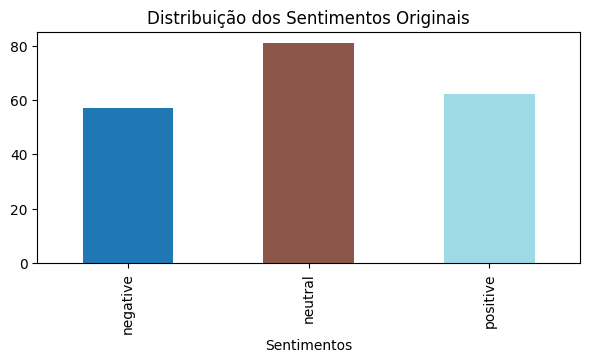

In [29]:
cmap = plt.get_cmap('tab20', df_results['Original_sentiment'].nunique())

ax = df_results['Original_sentiment'].value_counts().sort_index()\
    .plot(kind='bar',
          title='Distribuição dos Sentimentos Originais',
          figsize=(7, 3),
          color=[cmap(i) for i in range(df_results['Original_sentiment'].nunique())])

ax.set_xlabel('Sentimentos')
plt.show()

In [30]:
count_sentiment = df_results['Original_sentiment'].value_counts().sort_index()
print(count_sentiment)

Original_sentiment
negative    57
neutral     81
positive    62
Name: count, dtype: int64


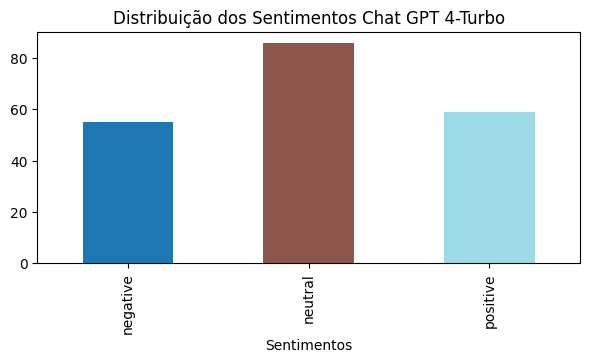

In [31]:
cmap = plt.get_cmap('tab20', df_results['Sentiment_OpenAI'].nunique())

ax = df_results['Sentiment_OpenAI'].value_counts().sort_index()\
    .plot(kind='bar',
          title='Distribuição dos Sentimentos Chat GPT 4-Turbo',
          figsize=(7, 3),
          color=[cmap(i) for i in range(df_results['Sentiment_OpenAI'].nunique())])

ax.set_xlabel('Sentimentos')
plt.show()

In [32]:
count_sentiment = df_results['Sentiment_OpenAI'].value_counts().sort_index()
print(count_sentiment)

Sentiment_OpenAI
negative    55
neutral     86
positive    59
Name: count, dtype: int64


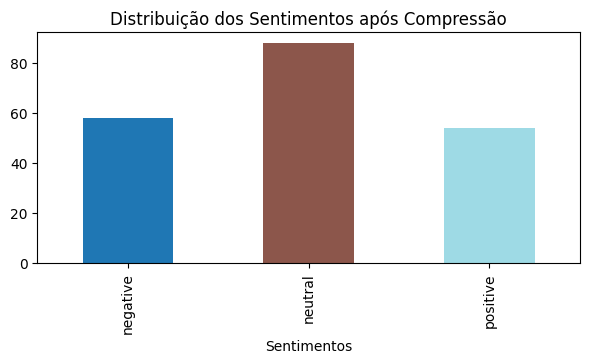

In [33]:
cmap = plt.get_cmap('tab20', df_results['Sentiment_LLMLingua'].nunique())

ax = df_results['Sentiment_LLMLingua'].value_counts().sort_index()\
    .plot(kind='bar',
          title='Distribuição dos Sentimentos após Compressão',
          figsize=(7, 3),
          color=[cmap(i) for i in range(df_results['Sentiment_LLMLingua'].nunique())])

ax.set_xlabel('Sentimentos')
plt.show()

In [34]:
count_sentiment = df_results['Sentiment_LLMLingua'].value_counts().sort_index()
print(count_sentiment)

Sentiment_LLMLingua
negative    58
neutral     88
positive    54
Name: count, dtype: int64


**CÁLCULO DE ACURÁCIA E MATRIZ DE CONFUSÃO**

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report

In [36]:
accuracy_openai = accuracy_score(df_results['Original_sentiment'], df_results['Sentiment_OpenAI'])

report_openai = classification_report(df_results['Original_sentiment'], df_results['Sentiment_OpenAI'], target_names=['negative', 'neutral', 'positive'])

print(f"Acurácia OpenAI: {accuracy_openai * 100:.2f}%")
print("\nRelatório de Classificação OpenAI:\n", report_openai)


Acurácia OpenAI: 74.50%

Relatório de Classificação OpenAI:
               precision    recall  f1-score   support

    negative       0.78      0.75      0.77        57
     neutral       0.71      0.75      0.73        81
    positive       0.76      0.73      0.74        62

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.75       200
weighted avg       0.75      0.74      0.75       200



In [37]:
accuracy_llmlingua = accuracy_score(df_results['Original_sentiment'], df_results['Sentiment_LLMLingua'])
report_llmlingua = classification_report(df_results['Original_sentiment'], df_results['Sentiment_LLMLingua'], target_names=['negative', 'neutral', 'positive'])

print(f"Acurácia LLMLingua: {accuracy_llmlingua * 100:.2f}%")
print("\nRelatório de Classificação LLMLingua:\n", report_llmlingua)

Acurácia LLMLingua: 72.00%

Relatório de Classificação LLMLingua:
               precision    recall  f1-score   support

    negative       0.72      0.74      0.73        57
     neutral       0.67      0.73      0.70        81
    positive       0.80      0.69      0.74        62

    accuracy                           0.72       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



In [38]:
conf_matrix_openai = confusion_matrix(df_results['Original_sentiment'], df_results['Sentiment_OpenAI'])
conf_matrix_llmlingua = confusion_matrix(df_results['Original_sentiment'], df_results['Sentiment_LLMLingua'])

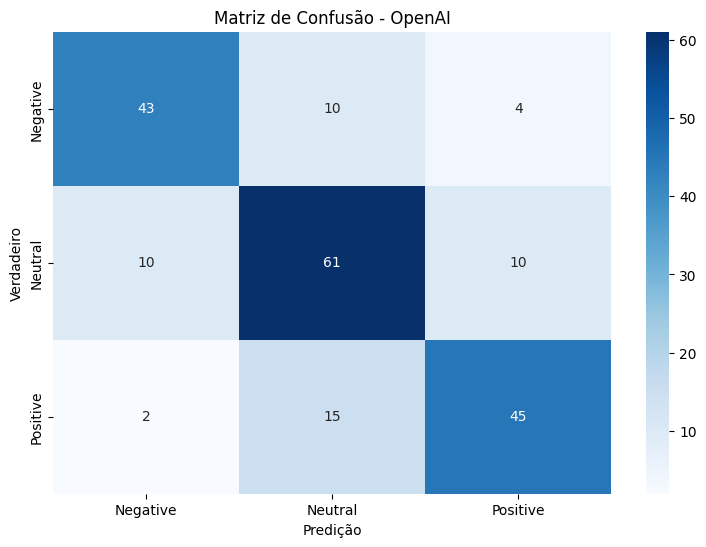

In [39]:
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix_openai, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Matriz de Confusão - OpenAI')
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.show()

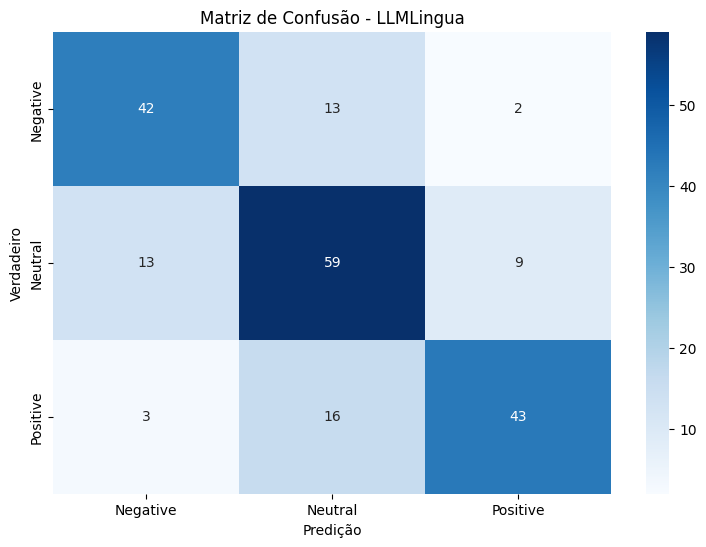

In [40]:
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix_llmlingua, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Matriz de Confusão - LLMLingua')
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.show()